## Homework 1: camera calibration

**Due date:** October 1st 2019

The goal of the assignment is to implement the linear calibration method described in Section 1.3.1 of this [book chapter](https://www.di.ens.fr/%7Eponce/introvis/sbook.pdf).

![calibration-image](img/calibration.jpg)

**Detailed instructions:** The `pts2d` array contains in its columns the (u,v) positions of the image data points (with, by convention, the u and v coordinates with origin at the bottom left of the image, u going right and v going up), while the `pts3d` array contains in its columns the (x,y,z) coordinate vectors of the corresponding 3D points in a right-handed coordinate system. The origin of the world coordinate system is supposed to be in front of the camera, with negative z value.

You should write functions that:
* Compute the 3x4 projection matrix  M estimated from these data using the linear least-squares method of Sec. 1.3.1.
* Compute the corresponding matrix K of intrinsic parameters using the method from M using the method described in the same section.
* Draw together the input image points and the projection of the 3D data points obtained using M to generate a figure like Fig. 1.18, and estimate the root-mean-sqared reprojection error.

You should also write short explanations describing your work and reporting your results.

In [4]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
pts2d = np.loadtxt("pts2d.txt")
pts3d = np.loadtxt("pts3d.txt")

I write the explantion at the beginning of every cell to describe my work in this cell.

question1: 
In this step, I insert a column of (1,1,....1) to transform the pts3d array(which is n*3) to a n*4  
coordinate vector  and also check its dimension in the end. 
The reason why I did this transform is to make the homogeneous coordinate vector P = (X, Y, Z, 1)T of a point P in some fixed world coordinate system

In [5]:

n=len(pts2d)
a=np.ones(n)
b=np.insert(pts3d,3,values=a,axis=1)
b.shape

(491, 4)

in this step, I make a big P matrix using the method shown in page 22 of Section 1.3.1. And then observe its dimension to ensure it has
the dimension of n*12

In [6]:

n=len(pts2d)
P=np.zeros((2*n,12))
j=0
for i in range(0,2*n-1):
    if i%2==0:
        P[i,0:4]=b[j]
        P[i,4:8]=0
        P[i,8:12]=-1*pts2d[j,0]*b[j]
    if i%2==1:
        P[i,0:4]=0
        P[i,4:8]=b[j]
        P[i,8:12]=-1*pts2d[j,1]*b[j]
        j=j+1
P.shape

(982, 12)

Then accoding to linear least-squares method, I need to first make a matrix which is A=transpose(P)*P, we know ideally it should be Pm=0. 
However, there will be some error, so we should use least-squares method to minimize the error, that is \Pm\^2=m*transpose(P)*P*m,
then I should find the smallest eigenvector corresponding to the smallest eigenvalue of A, then reshape it to a 3*4 matrix, so I use svd method

In [7]:
A=np.matmul(np.transpose(P),P)
L,Ma,N=np.linalg.svd(A)
#Since svd will arrange the eigenvector with the decending orders, 
#so the lowest row will have the smallest eigenvector, and then after reshape,
#we get projection M
M=np.reshape(N[11,:],(3,4))

In [8]:
##Report the result of M
M

array([[-4.53357794e-03, -5.65432350e-04,  2.02850184e-03,
        -5.23178897e-01],
       [-1.84275935e-03,  4.15974882e-03, -1.68770499e-03,
        -8.52193203e-01],
       [-3.25679958e-06, -1.13799954e-06, -3.35218803e-06,
        -1.43209319e-03]])

In [9]:
## Then I need to ensure the norm of M is one, which is told in the book chapter.
np.linalg.norm(M)

0.9999999999999998

Question2: 
Compute the corresponding matrix K of intrinsic parameters using the method from M 
using the method described in the same section
first, I get a1, a2, a3 from projection matrix M by theorem 1 :LetM=􏰃[A b􏰄]be a 3×4 matrix and let ai (i=1,2,3) denote 
the rows of the matrix A formed by the three leftmost columns of M(on book chapter page 17)

In [10]:
a1=M[0,0:3]
a2=M[1,0:3]
a3=M[2,0:3]

In [11]:
##Then I calculate the parameter of K by the formula of 1.24,1.25 and 1.26
f1=np.cross(a1,a3)
f2=np.cross(a2,a3)
norm1=np.linalg.norm(f1)
norm2=np.linalg.norm(f2)
costheta=-np.dot(f1,f2)/np.dot(norm1,norm2)
sintheta=math.sqrt(1-costheta**2)
rho_squared=1/(np.linalg.norm(a3)**2)
rho_squared
x0=rho_squared*np.dot(a1,a3)
y0=rho_squared*np.dot(a2,a3)
alpha=rho_squared*norm1*sintheta
beta=rho_squared*norm2*sintheta

In [12]:
##make the matrix K using formula 1.11 on book chapter
K=[[alpha, -alpha*costheta/sintheta,x0],[0,beta/sintheta,y0],[0,0,1]]

In [13]:
##Report the result of K:
K

[[970.3065262082747, 0.10336667758964285, 372.0348794178565],
 [0, 963.3733612640709, 299.28798792688116],
 [0, 0, 1]]

Question3:
Draw together the input image points and the projection of the 3D data points obtained using M to generate a figure like Fig. 1.18
and estimate the root-mean-sqared reprojection error.
first, I calculate the projection of the 3D data points obtained using M by formula 1.20 on book chapter

<function matplotlib.pyplot.show(*args, **kw)>

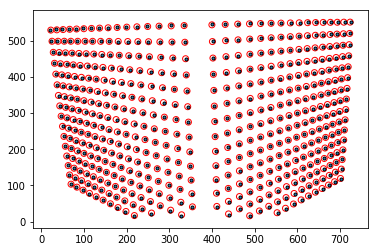

In [14]:
m1=np.transpose(M[0,:])
m2=np.transpose(M[1,:])
m3=np.transpose(M[2,:])
x=np.dot(b,m1)/np.dot(b,m3)
y=np.dot(b,m2)/np.dot(b,m3)
#Then I use red circle to represent the input image points 
#and black plots to represent the projection of the 3D data points 
#obtained using M and draw them together using matplotlib
red=plt.scatter(pts2d[:,0],pts2d[:,1],marker='o',c='',edgecolors='r')
black=plt.scatter(x,y,marker='.',edgecolors='k')
##Report the figure
plt.show

In [15]:
##Second, I create a new matrix called pro to 
#store the projection of the 3D data points obtained using M：
pro=np.zeros(shape=(len(x),2))
pro[:,0]=x
pro[:,1]=y

In [16]:
##Then I calculate the mse of these two data points set:
new=pro-pts2d
sum=0
for i in range(0, len(x)):
    sum=sum+new[i,0]**2+new[i,1]**2
mse=sum/len(x)
mse

0.916556237155357

In [17]:
##Finally, I calculate rmse:
rmse=np.sqrt(mse)


In [18]:
## Report the final root mean square error, this rmse is small, 
#which suggest using projection matrix would not cause a big error.
rmse

0.9573694360879488

In [19]:
##Final Report
#Projection matrix M:
M

array([[-4.53357794e-03, -5.65432350e-04,  2.02850184e-03,
        -5.23178897e-01],
       [-1.84275935e-03,  4.15974882e-03, -1.68770499e-03,
        -8.52193203e-01],
       [-3.25679958e-06, -1.13799954e-06, -3.35218803e-06,
        -1.43209319e-03]])

In [20]:
#corresponding matrix K 
K

[[970.3065262082747, 0.10336667758964285, 372.0348794178565],
 [0, 963.3733612640709, 299.28798792688116],
 [0, 0, 1]]

In [21]:
#root mean square error:
rmse

0.9573694360879488